### **This notebook is for practicing Polynomial Regression**

- Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data= fetch_california_housing()

In [4]:
df= pd.DataFrame(data.data, columns= data.feature_names)
df['MedHouseVal']= data.target

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Univariate Analysis**

<Figure size 800x600 with 0 Axes>

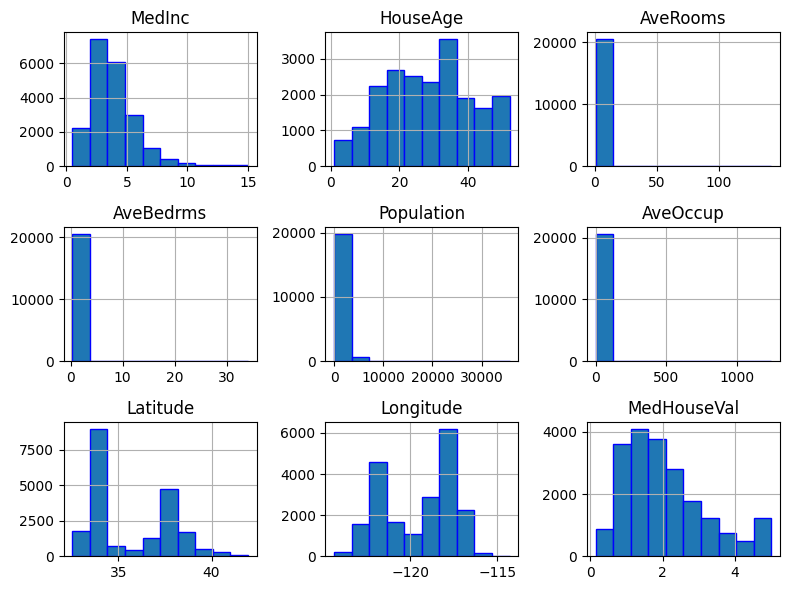

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df.hist(figsize=(8,6), bins=10, edgecolor='blue')
plt.tight_layout()
plt.show()

**Correlation**

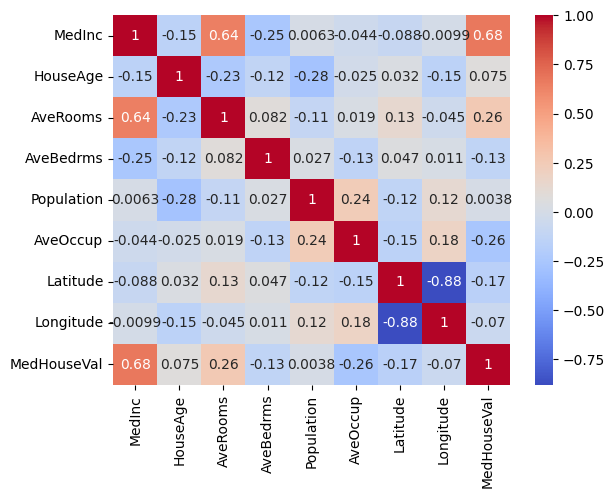

In [9]:
import seaborn as sns 
corr= df.corr(method='spearman')

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Model Building**

In [12]:
X= df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup' ]]
y= df['MedHouseVal']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

**Standerdizing**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

**Apply Polynomial Degree**

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly= PolynomialFeatures(degree=3, include_bias=True)

X_train_poly= poly.fit_transform(X_train_scaled)
X_test_poly=  poly.fit_transform(X_test_scaled)

In [17]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()